In [1]:
import _pickle as cPickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.api.types import is_numeric_dtype

# Check the whole data distribution, compare the train and val

In [2]:
def read_pickle(file_path):
    with open(file_path, 'rb') as f:
        file_data = cPickle.load(f)
    return file_data


data = pd.read_csv('../data/adult.csv')
data_train, _, _ = read_pickle('../data/train_adult.pickle')
data_val, _, _ = read_pickle('../data/valid_adult.pickle')

### List columns

In [3]:
columns = data.columns.values
# print('Columns', columns)

### Change the order, sort the columns to print string_dtype columns first, numerical columns second

In [4]:
columns_to_sort = data.columns
columns_properties = np.zeros(len(columns_to_sort), dtype=np.uint8)

for i, c in enumerate(columns_to_sort):
    columns_properties[i] = is_numeric_dtype(data[c])

zip_obj = zip(np.arange(len(columns_to_sort)), columns_to_sort, columns_properties)
print('Before the sort', np.array(list(zip_obj)), sep='\n')

indices = np.argsort(columns_properties)
columns_to_sort = columns_to_sort[indices]
for i, c in enumerate(columns_to_sort):
    columns_properties[i] = is_numeric_dtype(data[c])

zip_obj = zip(np.arange(len(columns_to_sort)), columns_to_sort, columns_properties)
print('After the sort', np.array(list(zip_obj)), sep='\n')


Before the sort
[['0' 'age' '1']
 ['1' 'workclass' '0']
 ['2' 'fnlwgt' '1']
 ['3' 'education' '0']
 ['4' 'education-num' '1']
 ['5' 'marital-status' '0']
 ['6' 'occupation' '0']
 ['7' 'relationship' '0']
 ['8' 'race' '0']
 ['9' 'sex' '0']
 ['10' 'capital-gain' '1']
 ['11' 'capital-loss' '1']
 ['12' 'hours-per-week' '1']
 ['13' 'native-country' '0']
 ['14' 'salary' '0']]
After the sort
[['0' 'workclass' '0']
 ['1' 'education' '0']
 ['2' 'marital-status' '0']
 ['3' 'occupation' '0']
 ['4' 'relationship' '0']
 ['5' 'race' '0']
 ['6' 'sex' '0']
 ['7' 'native-country' '0']
 ['8' 'salary' '0']
 ['9' 'age' '1']
 ['10' 'fnlwgt' '1']
 ['11' 'education-num' '1']
 ['12' 'capital-gain' '1']
 ['13' 'capital-loss' '1']
 ['14' 'hours-per-week' '1']]


### Show the statistics

In [5]:
for c in columns_to_sort:
    print('-' * 50)
    stats = data[c].describe()
    total = int(stats['count'])

    print(f'Column [{c:30}] statistics, total {total:6}')
    if 'min' in stats:
        a_min, a_mean, a_max = stats['min'], stats['mean'], stats['max']
        a_mean = np.around(a_mean, 2)
        print(f'MIN [{a_min:10}] MEAN [{a_mean:10}] MAX [{a_max:10}]')
    elif 'top' in stats:
        a_unique, a_top, a_freq = stats['unique'], stats['top'], stats['freq']
        print(f'Unique [{a_unique:4}] Top [{a_top:20}] Freq [{a_freq:6}]')


--------------------------------------------------
Column [workclass                     ] statistics, total  32561
Unique [   9] Top [ Private            ] Freq [ 22696]
--------------------------------------------------
Column [education                     ] statistics, total  32561
Unique [  16] Top [ HS-grad            ] Freq [ 10501]
--------------------------------------------------
Column [marital-status                ] statistics, total  32561
Unique [   7] Top [ Married-civ-spouse ] Freq [ 14976]
--------------------------------------------------
Column [occupation                    ] statistics, total  32049
Unique [  15] Top [ Prof-specialty     ] Freq [  4073]
--------------------------------------------------
Column [relationship                  ] statistics, total  32561
Unique [   6] Top [ Husband            ] Freq [ 13193]
--------------------------------------------------
Column [race                          ] statistics, total  32561
Unique [   5] Top [ White    

In [6]:
def analyze_categorical(column_name):
    data_arr = data[column_name].to_numpy()
    # Make Pandas great again! It provides a little bit richer functions
    rows_if_nan = pd.isnull(data_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Whole) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are added to the group with <<?>> label
        data_arr[rows_is_nan] = '?'

    values, counts = np.unique(data_arr, return_counts=True)
    indices = np.argsort(counts)
    values = values[indices]
    counts = counts[indices]
    counts = counts / np.sum(counts)
    print('Values', values)

    # Build in the order determined by the whole data
    data_train_arr = data_train[column_name].to_numpy()
    rows_if_nan = pd.isnull(data_train_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Train) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are added to the group with <<?>> label
        data_train_arr[rows_is_nan] = '?'

    values_train, counts_train = np.unique(data_train_arr, return_counts=True)
    temp_d = {values_train[i]:counts_train[i] for i in range(len(values_train))}
    counts_train = np.array([temp_d[v] if v in values_train else 0 for v in values])
    counts_train = counts_train / np.sum(counts_train)

    # Build in the order determined by the whole data
    data_val_arr = data_val[column_name].to_numpy()
    rows_if_nan = pd.isnull(data_val_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Val) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are added to the group with <<?>> label
        data_val_arr[rows_is_nan] = '?'

    values_val, counts_val = np.unique(data_val_arr, return_counts=True)
    temp_d = {values_val[i]:counts_val[i] for i in range(len(values_val))}
    counts_val = np.array([temp_d[v] if v in values_val else 0 for v in values])
    counts_val = counts_val / np.sum(counts_val)

    plt.figure(figsize=(20, 5))
    plt.title(f'Distribution of the <<{column_name}>>')
    plt.subplot(1, 4, 1)
    plt.bar(x=values, height=counts, color='red', label='whole')
    plt.bar(x=values, height=counts_train, color='green', alpha=0.25, label='train')
    plt.bar(x=values, height=counts_val, color='blue', alpha=0.25, label='val')
    plt.xlabel('Comparing all')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 2)
    plt.bar(x=values, height=counts, color='red', label='whole')
    plt.bar(x=values, height=counts_train, color='green', alpha=0.5, label='train')
    plt.xlabel('Train to whole')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 3)
    plt.bar(x=values, height=counts, color='red', label='whole')
    plt.bar(x=values, height=counts_val, color='blue', alpha=0.5, label='val')
    plt.xlabel('Val to whole')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 4)
    plt.bar(x=values, height=counts_train, color='green', label='train')
    plt.bar(x=values, height=counts_val, color='blue', alpha=0.5, label='val')
    plt.xlabel('Train to val')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.show()

In [7]:
def analyze_numerical(column_name):
    data_arr = data[column_name].to_numpy()
    rows_if_nan = pd.isnull(data_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Whole) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are changed to 0 (for simplicity)
        data_arr[rows_is_nan] = 0

    data_train_arr = data_train[column_name].to_numpy()
    rows_if_nan = pd.isnull(data_train_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Train) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are changed to 0 (for simplicity)
        data_train_arr[rows_is_nan] = 0

    data_val_arr = data_val[column_name].to_numpy()
    rows_if_nan = pd.isnull(data_val_arr)
    rows_is_nan = np.nonzero(rows_if_nan)[0]
    if len(rows_is_nan) != 0:
        print('(Val) There are', len(rows_is_nan), 'rows with NaN values')
        # NaN values are changed to 0 (for simplicity)
        data_val_arr[rows_is_nan] = 0

    plt.figure(figsize=(20, 5))
    plt.title(f'Distribution of the <<{column_name}>>')
    plt.subplot(1, 4, 1)
    # Get bins
    n, bins, patches = plt.hist(data_arr, bins=20, color='red', rwidth=0.8, label='whole')
    # Use bins in all future plots
    plt.hist(data_train_arr, bins=bins, color='green', alpha=0.25, rwidth=0.8, label='train')
    plt.hist(data_val_arr, bins=bins, color='blue', alpha=0.25, rwidth=0.8, label='val')
    plt.xlabel('Comparing all')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 2)
    plt.hist(data_arr, bins=bins, color='red', rwidth=0.8, label='whole')
    plt.hist(data_train_arr, bins=bins, color='green', alpha=0.5, rwidth=0.8, label='train')
    plt.xlabel('Train to whole')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 3)
    plt.hist(data_arr, bins=bins, color='red', rwidth=0.8, label='whole')
    plt.hist(data_arr, bins=bins, color='blue', alpha=0.5, rwidth=0.8, label='val')
    plt.xlabel('Val to whole')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.subplot(1, 4, 4)
    plt.hist(data_train_arr, bins=bins, color='green', rwidth=0.8, label='train')
    plt.hist(data_val_arr, bins=bins, color='blue', alpha=0.5, rwidth=0.8, label='val')
    plt.xlabel('Train to val')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    plt.rcParams['font.size'] = 12

    plt.show()

Values [' Never-worked' ' Without-pay' ' Federal-gov' ' Self-emp-inc'
 ' State-gov' ' ?' ' Local-gov' ' Self-emp-not-inc' ' Private']


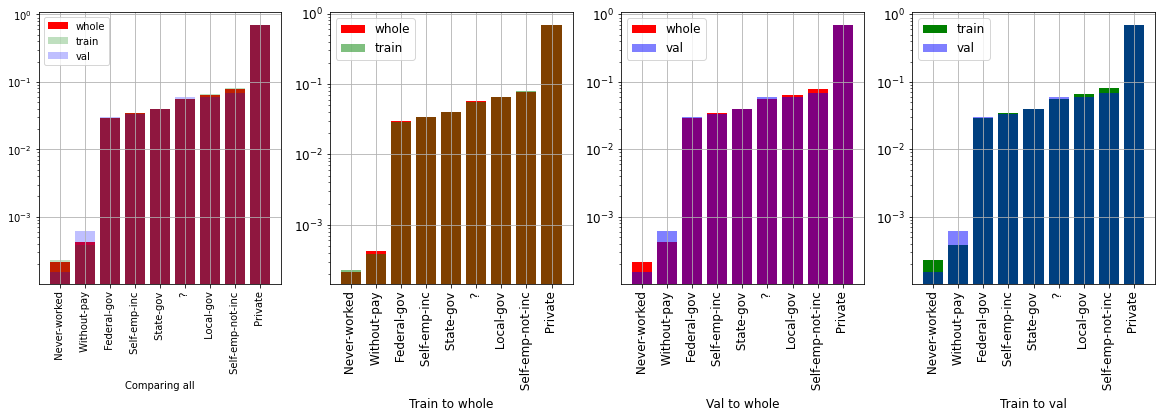

In [8]:
analyze_categorical(column_name='workclass')

Values [' Preschool' ' 1st-4th' ' 5th-6th' ' Doctorate' ' 12th' ' 9th'
 ' Prof-school' ' 7th-8th' ' 10th' ' Assoc-acdm' ' 11th' ' Assoc-voc'
 ' Masters' ' Bachelors' ' Some-college' ' HS-grad']


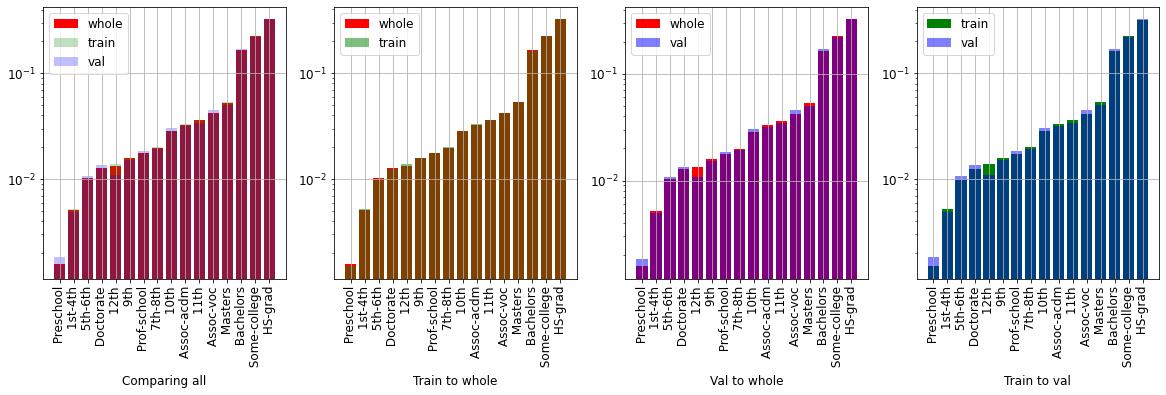

In [9]:
analyze_categorical(column_name='education')

Values [' Married-AF-spouse' ' Married-spouse-absent' ' Widowed' ' Separated'
 ' Divorced' ' Never-married' ' Married-civ-spouse']


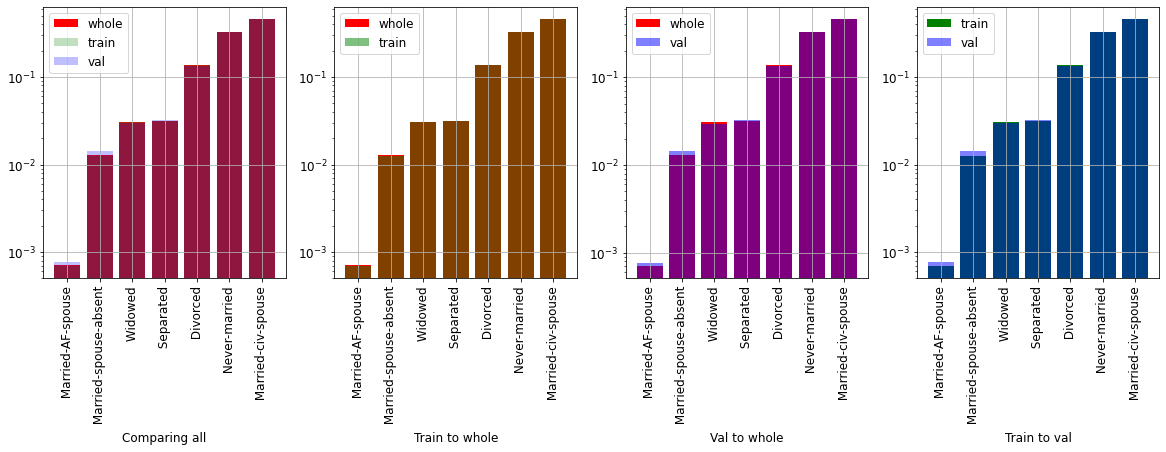

In [10]:
analyze_categorical(column_name='marital-status')

(Whole) There are 512 rows with NaN values
Values [' Armed-Forces' ' Priv-house-serv' '?' ' Protective-serv' ' Tech-support'
 ' Farming-fishing' ' Handlers-cleaners' ' Transport-moving' ' ?'
 ' Machine-op-inspct' ' Other-service' ' Sales' ' Adm-clerical'
 ' Exec-managerial' ' Craft-repair' ' Prof-specialty']
(Train) There are 397 rows with NaN values
(Val) There are 115 rows with NaN values


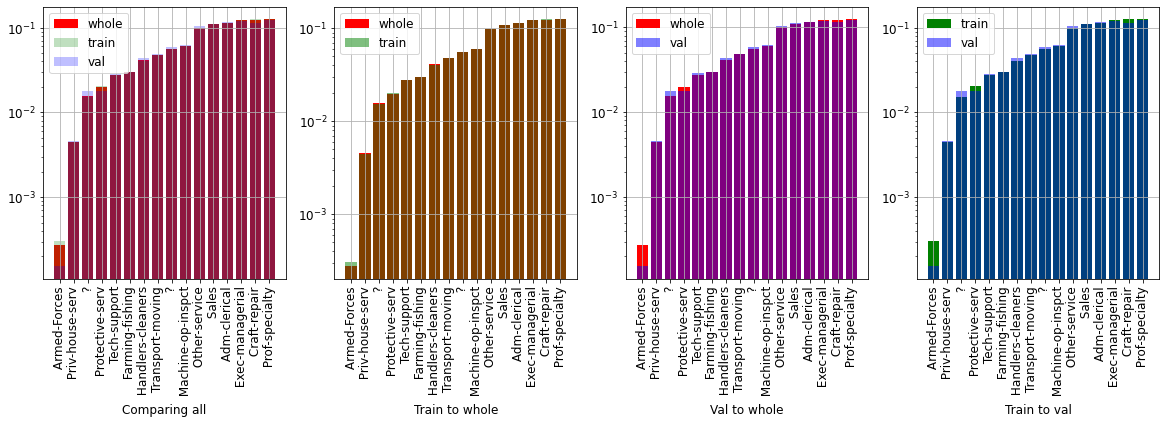

In [11]:
analyze_categorical(column_name='occupation')

Values [' Other-relative' ' Wife' ' Unmarried' ' Own-child' ' Not-in-family'
 ' Husband']


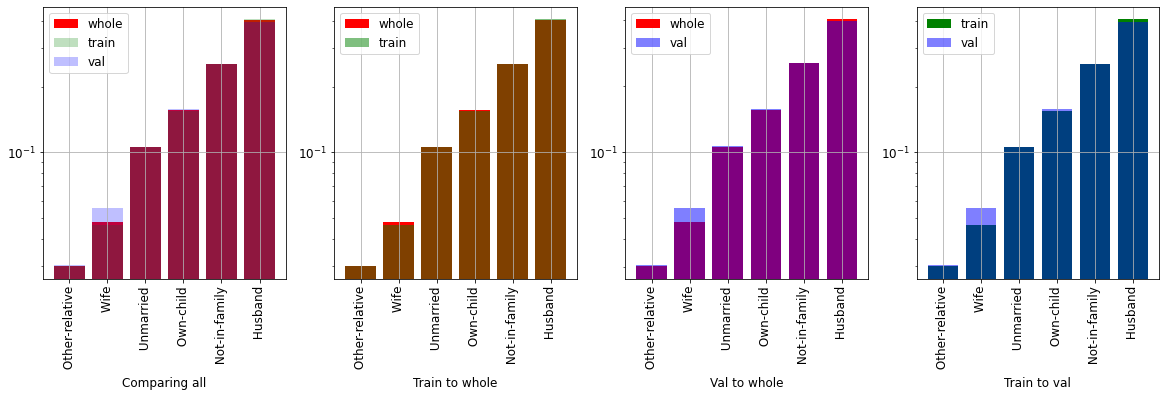

In [12]:
analyze_categorical(column_name='relationship')

Values [' Other' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' White']


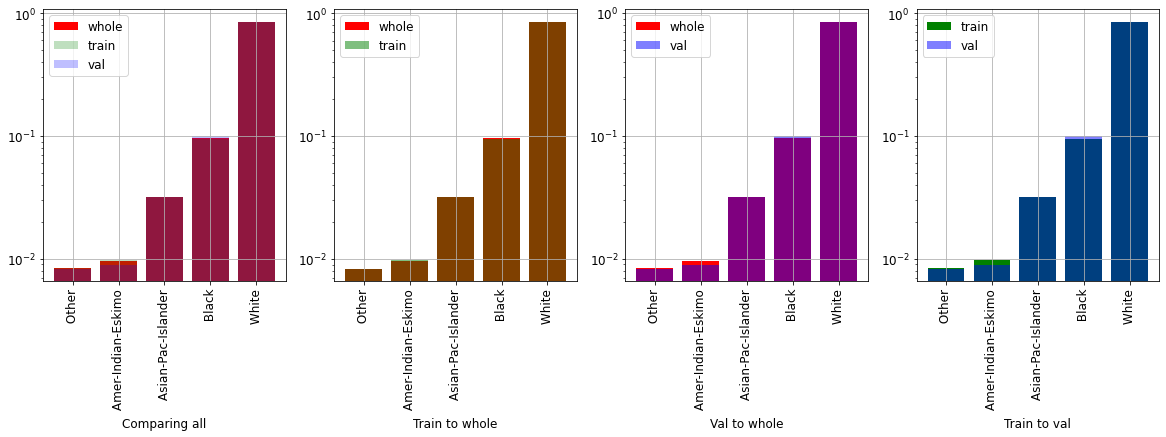

In [13]:
analyze_categorical(column_name='race')

Values [' Female' ' Male']


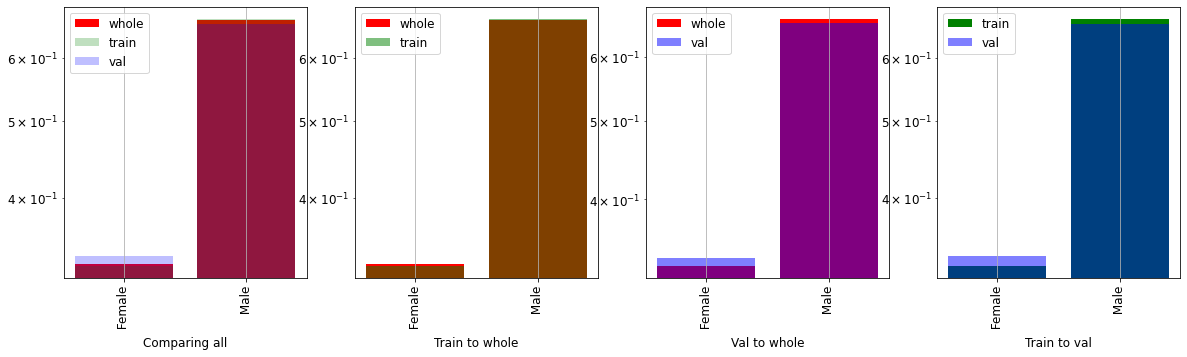

In [14]:
analyze_categorical(column_name='sex')

Values [' Holand-Netherlands' ' Scotland' ' Hungary' ' Honduras'
 ' Outlying-US(Guam-USVI-etc)' ' Yugoslavia' ' Thailand' ' Laos'
 ' Trinadad&Tobago' ' Cambodia' ' Hong' ' Ireland' ' Ecuador' ' France'
 ' Greece' ' Peru' ' Nicaragua' ' Portugal' ' Iran' ' Haiti' ' Taiwan'
 ' Columbia' ' Poland' ' Japan' ' Guatemala' ' Vietnam'
 ' Dominican-Republic' ' Italy' ' China' ' South' ' Jamaica' ' England'
 ' Cuba' ' India' ' El-Salvador' ' Puerto-Rico' ' Canada' ' Germany'
 ' Philippines' ' ?' ' Mexico' ' United-States']


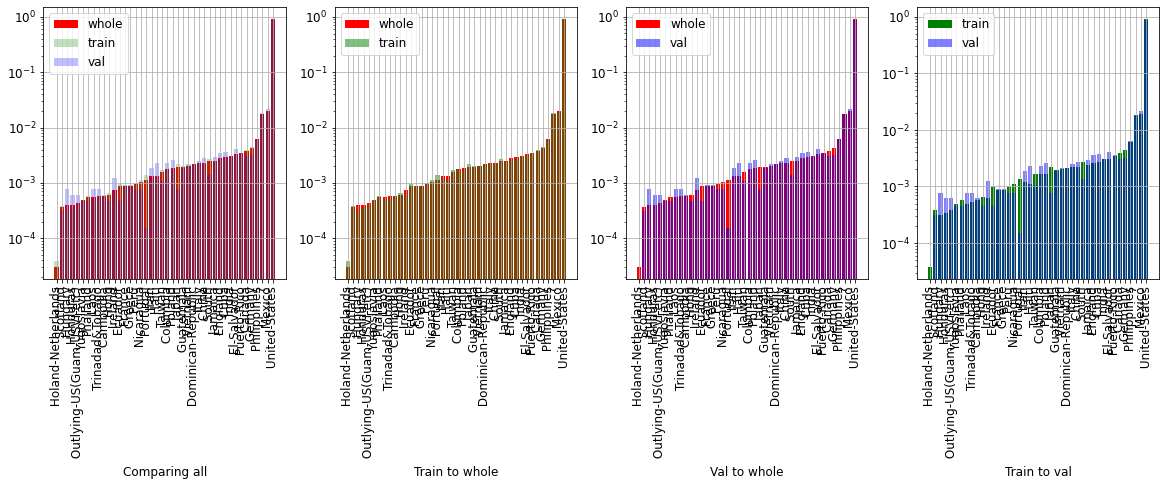

In [15]:
analyze_categorical(column_name='native-country')

Values ['>=50k' '<50k']


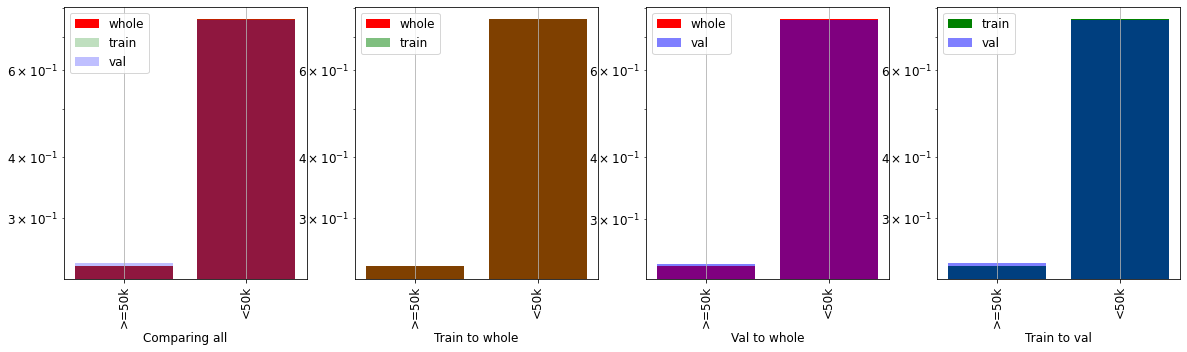

In [16]:
analyze_categorical(column_name='salary')

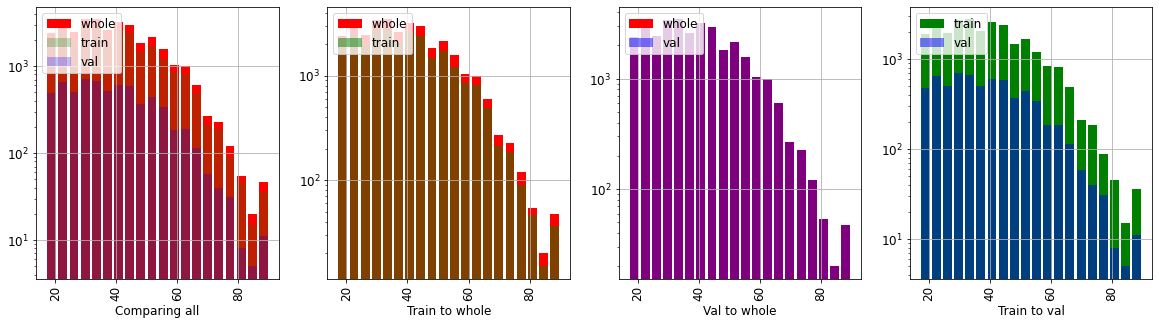

In [18]:
analyze_numerical('age')

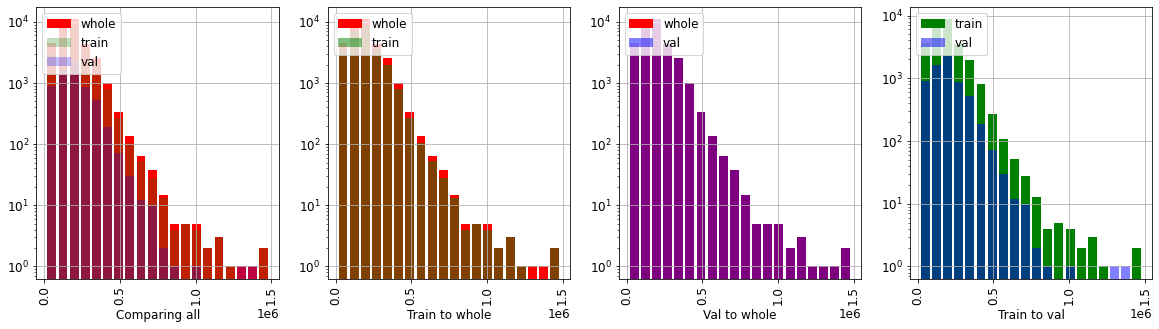

In [19]:
analyze_numerical('fnlwgt')

(Whole) There are 487 rows with NaN values
(Train) There are 392 rows with NaN values
(Val) There are 95 rows with NaN values


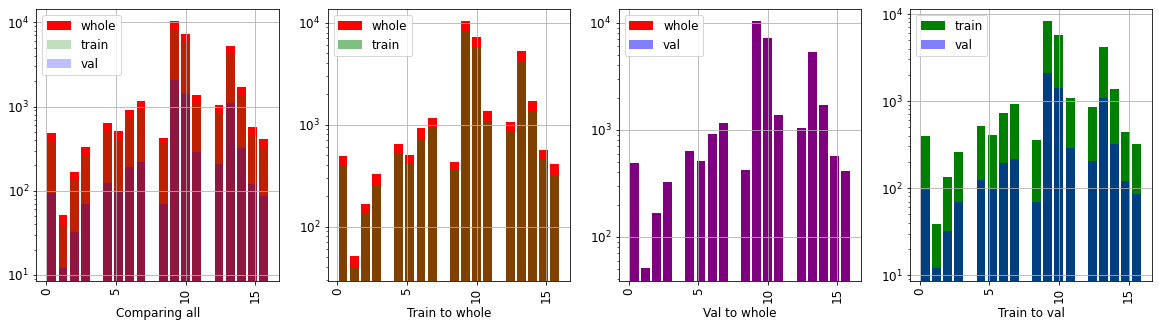

In [20]:
analyze_numerical('education-num')

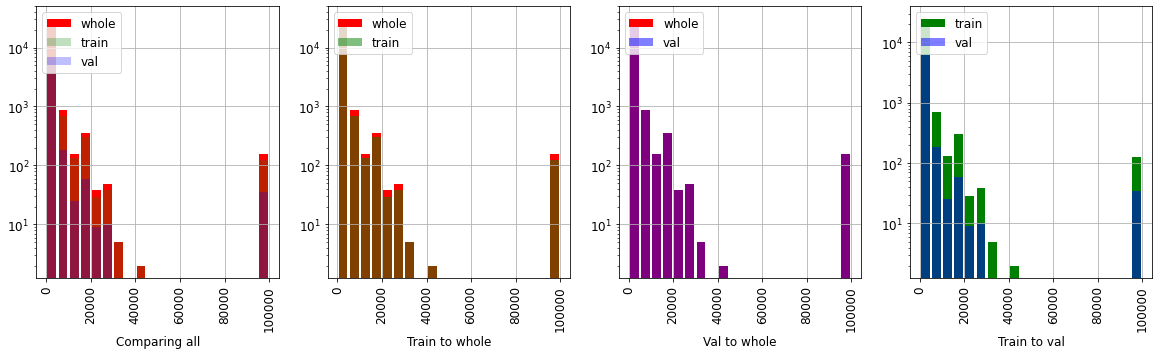

In [21]:
analyze_numerical('capital-gain')

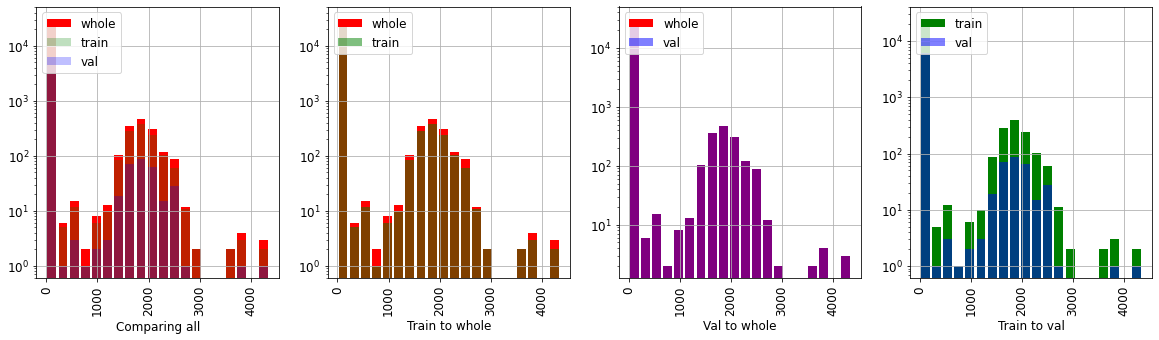

In [22]:
analyze_numerical('capital-loss')

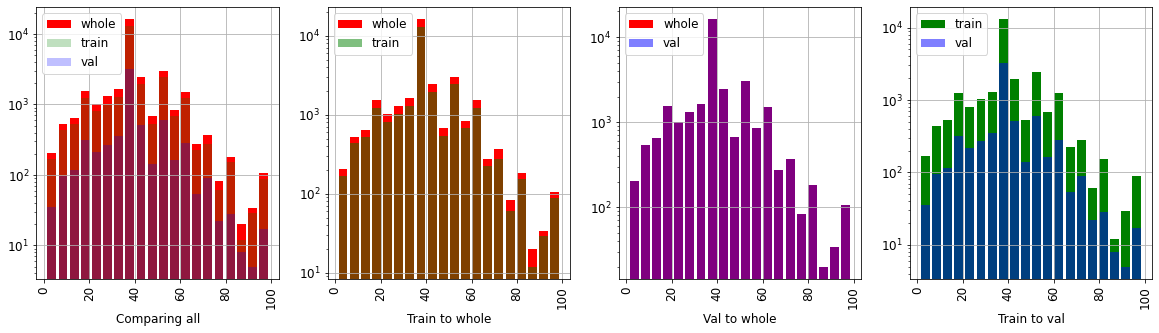

In [23]:
analyze_numerical('hours-per-week')

Analysis

Problem: there are a lot of values with <<?>> label
Probable solutions:
1. Assign values to the most frequent class
   + it is OK in the situation, where the most frequent class is clearly observable
   - most frequent class has to be identified by the train data
2. Distribute values according to general statistics of a feature.
3. Do nothing, i.e. leave 0 for numerical and ? for categorical
Solution:
Chosen variant 3, because it is also OK and simple

Seems that there is a little skew between train and val data, but there are no definite differences.
This is maybe because of a bigger portion of data in the train subset.

In [30]:
distr = np.array([len(data), len(data_train), len(data_val)]) / len(data)
print('Whole, train, val:', list(np.around(distr, decimals=3)))


Whole, train, val: [1.0, 0.8, 0.2]
